In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
os.environ["WANDB_DISABLED"] = "true"

import sys
# sys.path = ['/home/jxm3/research/retrieval/inversion'] + sys.path
sys.path = [
    p for p in sys.path
    if p not in ['/home/jxm3/research/prompting/imodelsX', '/home/jxm3/research/prompting/tree-prompt']
]
sys.path.append('/home/jxm3/research/retrieval/inversion')

In [157]:
import aliases

# inv_trainer = aliases.load_trainer_from_alias("openai_msmarco__msl128__100epoch")
corr_experiment, corr_trainer = aliases.load_experiment_and_trainer_from_alias("openai_msmarco__msl128__100epoch__correct")
inv_trainer = corr_trainer.inversion_trainer
corr_trainer.precompute_hypotheses()
corr_trainer.model.eval()
print()

loading alias openai_msmarco__msl128__100epoch__correct from /home/jxm3/research/retrieval/inversion/saves/d6ec9d5838a4ad3daeba636e5378a8a0...
loading alias openai_msmarco__msl128__100epoch from /home/jxm3/research/retrieval/inversion/saves/f9abd65db4c4823264b133816d08612f...


/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already u

================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
running openai on text_list of length 1, first element 'Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.'
	Decoded output shape ->  torch.Size([1, 69])
	Decoded output -> And the trolls, twilight, was smooty, And swiggy, smeared, And wispy, wisping, wily, wiz, wizz, wizzy, wizzie, wizy, wit.
================ End trainer sanity check ================
Froze 353779584 params from model type <class 'models.inversion.InversionModel'>


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
running openai on text_list of length 1, first element 'Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.'
running openai on text_list of length 1, first element 'And the trolls, trolls, trolls, trolls, trolls, trolls, trolls, trolls, trolls, trolls, trolls,'
running openai on text_list of length 1, first element 'Was twiggy, tweety, and brilliant, And the smoots rool, tho twas smeet, and thy bluffs, wilts, woes.'
	Decoded output shape ->  torch.Size([1, 66])
	Decoded output -> Was twiggy, tweety, and brilliant, And the smoots rool, tho twas smeet, and thy bluffs, wilts, woes.
================ End trainer sanity check ================
Loading hypotheses from path /home/jxm3/research/retrieval/inversion/s

In [4]:
inv_trainer.args.per_device_eval_batch_size = 128
inv_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
inv_trainer.evaluate(
    eval_dataset=inv_trainer.eval_dataset["msmarco"].select(range(500))
)

generating from val:   0%|                                                                                             | 0/4 [00:00<?, ?it/s]/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[pred] *The parking lot will require the use of a separate parking space for the proposed use of the. building. [District Floor Plan: Use of existing floor plan space, dimensions, and/or permit requirements for each. subfloor/space will be provided in the Submitting Documents.
[true] *The use of the driveway as the required parking spaces will require a separate submittal for a Use Permit. [ ] Floor plan (dimensioned): Show overall building size, existing and proposed room locations, existing and. proposed new window(s)/door(s) size/location(s).



[pred] Our illuminated Seville map is encapsulated in a map of each of our cities, enabling you to discover the hidden gems of the city. Our enlightened Seville map also includes a map of the streets of the city centre, the central business district, the outskirts of the city center and the outskirts of the city center.e encourage you to take advantage of our easy-to-use, fully accessible and easy-to-use map of Seville, Valencia, Seville, an

{'eval_loss': 1.8212840557098389,
 'eval_accuracy': 0.37296875,
 'eval_pred_num_tokens': 84.2421875,
 'eval_true_num_tokens': 80.859375,
 'eval_token_set_precision': 0.49449547954573786,
 'eval_token_set_recall': 0.6135735671103746,
 'eval_token_set_f1': 0.5408127754169948,
 'eval_bleu_score': 17.018265783054993,
 'eval_meteor_score': 0.4086322968425175,
 'eval_rouge_score': 0.5200926582453688,
 'eval_exact_match': 0.006,
 'eval_emb_cos_sim': 0.9461870789527893,
 'eval_perplexity': 6.179788550222158,
 'eval_runtime': 16.9024,
 'eval_samples_per_second': 29.582,
 'eval_steps_per_second': 0.237}

In [5]:
inv_trainer.args.per_device_eval_batch_size = 8
inv_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 16,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
inv_trainer.evaluate(
    eval_dataset=inv_trainer.eval_dataset["msmarco"].select(range(500))
)

generating from val:   0%|                                                                                            | 0/63 [00:00<?, ?it/s]/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[pred] *The proposed parking lot will require the use of a separate floor plan for the. use of the parking space, as well as the use of a separate floor plan for the. use of the parking space. ________________________________________________________________________________________________________________________________________.
[true] *The use of the driveway as the required parking spaces will require a separate submittal for a Use Permit. [ ] Floor plan (dimensioned): Show overall building size, existing and proposed room locations, existing and. proposed new window(s)/door(s) size/location(s).



[pred] Our illuminated Seville street map enables you to discover the hidden gems of Seville in a map-enabled format. Each street map is accompanied by a map of the city center, a map of the outskirts of Seville, a map of the outskirts of Seville, a map of the outskirts of Seville, a map of Seville, and a map of Sevilleâs central business district.eep in mind that even the most discerning 

{'eval_loss': 1.8122893571853638,
 'eval_accuracy': 0.42490625,
 'eval_pred_num_tokens': 90.8984375,
 'eval_true_num_tokens': 80.859375,
 'eval_token_set_precision': 0.4866140063659331,
 'eval_token_set_recall': 0.6351822989278202,
 'eval_token_set_f1': 0.5398807236560966,
 'eval_bleu_score': 17.337650588777013,
 'eval_meteor_score': 0.4026271140267121,
 'eval_rouge_score': 0.5025621932194124,
 'eval_exact_match': 0.006,
 'eval_emb_cos_sim': 0.9398435354232788,
 'eval_perplexity': 6.12445245409722,
 'eval_runtime': 145.3566,
 'eval_samples_per_second': 3.44,
 'eval_steps_per_second': 0.433}

In [158]:
corr_trainer.args.per_device_eval_batch_size = 128
corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
corr_trainer.evaluate(
    eval_dataset=corr_trainer.eval_dataset["msmarco"].select(range(500))
)

/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


generating from val:   0%|                                                                                             | 0/4 [00:00<?, ?it/s]

running openai on text_list of length 128, first element 'The permit will require the submission of a separate floor plan showing the. existing parking space for each proposed use. [District Floor Plan: Use Sizes, dimensions, and dimensions of. proposed use spaces][Sub-District Driveway: Driveway size is shown on the building.'


generating from val:  25%|█████████████████████▎                                                               | 1/4 [00:04<00:14,  4.92s/it]

running openai on text_list of length 128, first element 'The structure also allows for the depreciation of assets from a variety of sources, such as real estate, partnerships, and real estate. In order to qualify for an MLP, an individual investor must have passed through the entirety of the investment income. MLPs are primarily passive investment vehicles, generating about 90 percent of the income from the investment. In addition to the depreciation of assets, the MLP also allows for the distribution of surplus income to a partner.'


generating from val:  50%|██████████████████████████████████████████▌                                          | 2/4 [00:08<00:07,  3.87s/it]

running openai on text_list of length 128, first element 'I think the top PRIMARY beaches in Philippines, GUALAMO, PHALMA, MONGOSA, PALMA, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, PHALMA, GUALAMO, PHALMA, PHALMA, PHALMA, PHALMA, PHALMA, PHALMA is not'


generating from val:  75%|███████████████████████████████████████████████████████████████▊                     | 3/4 [00:11<00:03,  3.51s/it]

running openai on text_list of length 116, first element 'GRE Self-Learn book ( $20) The cost of just one book is a lot less if you plan to spend a lot of money. You can probably buy the GRE book with no reviewer, but youâll have to spend a lot of money to get the best idea of how much you can save. For this reason, consider this: a GRE book.'


[pred] The permit will require the submission of a separate floor plan showing the. existing parking space for each proposed use. [District Floor Plan: Use Sizes, dimensions, and dimensions of. proposed use spaces][Sub-District Driveway: Driveway size is shown on the building.
[true] *The use of the driveway as the required parking spaces will require a separate submittal for a Use Permit. [ ] Floor plan (dimensioned): Show overall building size, existing and proposed room locations, existing and. proposed new window(s)/door(s) size/location(s).



[pred] Our illuminated Seville map is fully inseparable with a street map of each city, a street map of the center of Seville, and a street map of the cityâs streets. This map also enables you to explore the hidden gems of Spainâs most coveted cities with a clear view of their streets, parks and neighborhoods.reyside, Caracas, and Seville offer an easy-to-use guide to the cityâs major attractions, allowing you to explore the hidden gems of t

{'eval_loss': 1.7110515832901,
 'eval_pred_num_tokens': 81.6171875,
 'eval_true_num_tokens': 80.859375,
 'eval_token_set_precision': 0.5600860342720706,
 'eval_token_set_recall': 0.6399717878030972,
 'eval_token_set_f1': 0.5931350171490075,
 'eval_bleu_score': 20.485722078781578,
 'eval_meteor_score': 0.461704855767975,
 'eval_rouge_score': 0.5761519924306981,
 'eval_exact_match': 0.006,
 'eval_emb_cos_sim': 0.9572774767875671,
 'eval_runtime': 24.4184,
 'eval_samples_per_second': 20.476,
 'eval_steps_per_second': 0.164}

In [159]:
corr_trainer.num_gen_recursive_steps = 20
corr_trainer.return_best_hypothesis = True

corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
corr_trainer.evaluate(
    eval_dataset=corr_trainer.eval_dataset["msmarco"].select(range(500))
)


generating from val:   0%|                                                                                             | 0/4 [00:00<?, ?it/s]

running openai on text_list of length 128, first element 'The permit will require the submission of a separate floor plan showing the. existing parking space for each proposed use. [District Floor Plan: Use Sizes, dimensions, and dimensions of. proposed use spaces][Sub-District Driveway: Driveway size is shown on the building.'
running openai on text_list of length 128, first element 'The permit will require the submission of a separate floor plan showing the. existing parking space and/or the location of the drive space. [See Submittal for. Required Uses: Driveway size(s): [Pasition size(s): Required).'
running openai on text_list of length 128, first element '*The use of a separate parking space will require the submission of a. floor plan showing the proposed use of the parking space. [See Submittal for. permit size requirements, including existing buildings, floor plans, and/or.'
running openai on text_list of length 128, first element '*The proposed use of the driveway will requir

generating from val:  25%|█████████████████████▎                                                               | 1/4 [01:03<03:10, 63.61s/it]

running openai on text_list of length 128, first element 'The structure also allows for the depreciation of assets from a variety of sources, such as real estate, partnerships, and real estate. In order to qualify for an MLP, an individual investor must have passed through the entirety of the investment income. MLPs are primarily passive investment vehicles, generating about 90 percent of the income from the investment. In addition to the depreciation of assets, the MLP also allows for the distribution of surplus income to a partner.'
running openai on text_list of length 128, first element 'The structure also allows for the depreciation of assets from a partnership or individual investment, such as real estate, tax savings, and the sale of assets to a partner. In order to qualify for a MLP, at least 90% of the income from the MLP must pass through through tax depreciation. MLPs have historically been a passive source of income, utilizing a combination of natural resources and energy s

generating from val:  50%|██████████████████████████████████████████▌                                          | 2/4 [02:04<02:04, 62.03s/it]

running openai on text_list of length 128, first element 'I think the top PRIMARY beaches in Philippines, GUALAMO, PHALMA, MONGOSA, PALMA, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, GUALAMO, PHALMA, PHALMA, GUALAMO, PHALMA, PHALMA, PHALMA, PHALMA, PHALMA, PHALMA is not'
running openai on text_list of length 128, first element 'I think the list of top beaches in the Philippines should be the PHOTOS of Panama, BOLOS, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO. Its white beaches in Cameroon. so amazing, their not only in Philippines but also in the world.'
running openai on text_list of length 128, first element 'I think the list of top beaches in the Philippines should be in PANGORIA. The white beaches in Camaro, with their amazing. beaches, was also so amazing. BOLAHO, GUALAMO, GUALAMO CREEK, GUALAMO. It is not only the Philippines, but also the world class.'
running openai on text_list of length 128, first element 'My list of top beaches in the Philipp

generating from val:  75%|███████████████████████████████████████████████████████████████▊                     | 3/4 [03:04<01:01, 61.30s/it]

running openai on text_list of length 116, first element 'GRE Self-Learn book ( $20) The cost of just one book is a lot less if you plan to spend a lot of money. You can probably buy the GRE book with no reviewer, but youâll have to spend a lot of money to get the best idea of how much you can save. For this reason, consider this: a GRE book.'
running openai on text_list of length 116, first element 'GRE Self-Learn Book ( $20) You can learn with just one book if youâre a lean student. The cost of this book is probably less than the cost of the GRE study plan. But youâll probably end up spending about $20 to buy the book, so be sure to get the best deal.'
running openai on text_list of length 116, first element 'GRE Self-Learn Book ( $20) The cost to buy one book with the GRE is definitely less than a budget-minded student. So you can probably pick a book for only $20 if you donât have much time to do any planning. But hereâs the good news: you can learn GRE without much scrimping.'
run

[pred] *The proposed use of the driveway will require a separate floor plan. [See Submittal for Floor Plan Dimensions.]: The existing parking space dimensions, including total size, location, and use permit, must be shown on the.
[true] *The use of the driveway as the required parking spaces will require a separate submittal for a Use Permit. [ ] Floor plan (dimensioned): Show overall building size, existing and proposed room locations, existing and. proposed new window(s)/door(s) size/location(s).



[pred] Our SEVILA STREET map enables you to explore your hidden treasures with a clear, concise map of each city, encapsulated in a beautifully arranged map of the city center and its surrounding areas.ource Seville, Caracas, and Seville Gardens are highlighted by a full-size map of the city center and the city center. This âinside-driveâ map is a perfect tool for navigating the city in a way that is both intuitive and intuitive.
[true] Our STREETWISE Seville Map enables you to explore ea

{'eval_loss': 1.7110515832901,
 'eval_pred_num_tokens': 79.703125,
 'eval_true_num_tokens': 80.859375,
 'eval_token_set_precision': 0.6289611817039702,
 'eval_token_set_recall': 0.6975913274639219,
 'eval_token_set_f1': 0.658505754775682,
 'eval_bleu_score': 26.46306068403211,
 'eval_meteor_score': 0.528309045499133,
 'eval_rouge_score': 0.6431129855420764,
 'eval_exact_match': 0.006,
 'eval_emb_cos_sim': 0.973503828048706,
 'eval_runtime': 251.2352,
 'eval_samples_per_second': 1.99,
 'eval_steps_per_second': 0.016}

In [11]:
corr_trainer.num_gen_recursive_steps = 10
corr_trainer.return_best_hypothesis = True

corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
corr_trainer.evaluate(
    eval_dataset=corr_trainer.eval_dataset["msmarco"].select(range(500))
)


generating from val:   0%|                                                                                             | 0/4 [00:00<?, ?it/s]

running openai on text_list of length 128, first element '[Draw/Submit Fees] The parking permit will require the use of a separate parking space for the proposed. building. Floor Plan: The floor plan dimensions, dimensions, and/or size of each existing, unused, and proposed use of the drive space will be shown on the.'
running openai on text_list of length 128, first element '[Draw/Submit Fees] The parking permit will require the use of a separate parking space. for each proposed floor plan, assuming the existing driveway, parking space, and. existing driveway are clearly shown on the building envelope.'
running openai on text_list of length 128, first element '[Draw/Purpose Permit: The use permit will require the use of the existing parking space, and a separate floor plan. showing the dimensions of each proposed parking space for driveway/subway use, as well as the size of the parking.'
running openai on text_list of length 128, first element '[Draw/Purpose Permit Required: The parki

generating from val:  25%|█████████████████████▎                                                               | 1/4 [00:30<01:32, 30.79s/it]

running openai on text_list of length 128, first element 'In addition to the structure of the MLP, it also allows for the depreciation of assets and real estate from a source of income. The MLP allows for the depreciation of assets and real estate from a source of income. Individuals have been investing in MLP properties for well over 90 years. To qualify as an MLP, a partnership must pass at least 50% of its assets from the investment to the individual investor. The majority of the assets are passive, such as real estate, and are primarily derived from natural resources.'
running openai on text_list of length 128, first element 'The MLP structure also allows for the depreciation of assets such as real estate, and the distribution of dividends to investors. In order to qualify for an MLP, an individual must have a substantial source of income, primarily through investment and investment income. The MLP passes through a structured tax-deferred structure, whereby at least 90 percent of t

generating from val:  50%|██████████████████████████████████████████▌                                          | 2/4 [01:02<01:02, 31.16s/it]

running openai on text_list of length 128, first element 'I think the top ten beaches in Philippines, including PANGALO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, GUALAMO, are so awesome. Their white beaches in the Philippines was not included in their list.'
running openai on text_list of length 128, first element 'I think the top beaches in the Philippines, with their white sand beaches, in BOCA, GUALAMO, PANGALO, GUALAMO, PANGALO, GUALAMO, PANGALO, GUALAMO, PANGALO, GUALAMO, GUALAMO, GUALAMO, are so awesome. It was not included in the list of the worlds best beaches.'
running openai on text_list of length 128, first element 'I think the worlds best beaches in the Philippines, with their white sand beaches, in BOCA, GUALAMO, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG, PANGANG. It was not included in my 

generating from val:  75%|███████████████████████████████████████████████████████████████▊                     | 3/4 [01:32<00:30, 30.74s/it]

running openai on text_list of length 116, first element 'GRE Self-Learn book (with only $20) You can spend a lot less if you plan to spend the money to buy just one book. The GRE book is a good read for the LEARN â but you probably wonât get much out of it. The cost of this book is probably around $120, if you are a seasoned shopper.'
running openai on text_list of length 116, first element 'GRE Self-Study Book (with only $20) You can plan to spend a lot less if you donât know how to read the GRE. The cost of just one book is a good choice for the GRE nerd. If you are budget conscious, you might want to consider buying one book â it will be a great investment.'
running openai on text_list of length 116, first element 'GRE Self-Study Book (with only $20) The learner can plan to spend a lot less if you donât learn well enough to get the GRE. The cost of just one book is probably the best choice for a LEARN. So, if you can pick one book and learn, you will pay about $20.'
running openai 

[pred] [Draw/Submit: The proposed use of the parking space will require a separate floor plan. for each existing building.] The floor plan will show the total dimensions, size, and location of driveways, windows, and/or sub-floors.
[true] *The use of the driveway as the required parking spaces will require a separate submittal for a Use Permit. [ ] Floor plan (dimensioned): Show overall building size, existing and proposed room locations, existing and. proposed new window(s)/door(s) size/location(s).



[pred] Our SEVILLE map is illuminated with a hidden map of each street, allowing you to clearly discover the city centre, its landmarks and attractions. This enlightened and readable map of Seville, Valencia and Madrid enables you to explore the city in a remarkably easy-to-use manner.ayside of Seville, our spirited city guide is a solitary guide to the most popular tourist destinations, including the famous Alhambra, the quaint streets of the city center and the quaint streets of the c

{'eval_loss': 1.7172094583511353,
 'eval_pred_num_tokens': 81.5546875,
 'eval_true_num_tokens': 80.859375,
 'eval_token_set_precision': 0.6058034901538049,
 'eval_token_set_recall': 0.6717544368285088,
 'eval_token_set_f1': 0.634072172908106,
 'eval_bleu_score': 23.81440216188662,
 'eval_meteor_score': 0.5061135356435692,
 'eval_rouge_score': 0.6203528670262147,
 'eval_exact_match': 0.006,
 'eval_emb_cos_sim': 0.970313549041748,
 'eval_runtime': 129.6262,
 'eval_samples_per_second': 3.857,
 'eval_steps_per_second': 0.031}

## plot beir lengths

In [29]:
from data_helpers import load_beir_datasets

beir = load_beir_datasets()
beir = corr_experiment._prepare_val_datasets_dict(
    model=corr_trainer.inversion_trainer.model,
    val_datasets_dict=beir,
    tokenizer=corr_experiment.load_tokenizer(),
    embedder_tokenizer=corr_trainer.embedder_tokenizer,
)

loading BEIR dataset: arguana
loading BEIR dataset: climate-fever
loading BEIR dataset: cqadupstack
loading BEIR dataset: dbpedia-entity
loading BEIR dataset: fever
loading BEIR dataset: fiqa
loading BEIR dataset: hotpotqa
loading BEIR dataset: msmarco
loading BEIR dataset: nfcorpus
loading BEIR dataset: nq
loading BEIR dataset: quora
loading BEIR dataset: scidocs
loading BEIR dataset: scifact
loading BEIR dataset: trec-covid
loading BEIR dataset: webis-touche2020
loading BEIR dataset: signal1m
loading BEIR dataset: trec-news
loading BEIR dataset: robust04
loading BEIR dataset: bioasq


Running tokenizer on dataset:   0%|          | 0/500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

running openai on text_list of length 64, first element 'I'm not saying I don't like the idea of on-the-job training too, but you can't expect the company to do that. Training workers is not their job - they're building software. Perhaps educational systems in the U.S. (or their students) should worry a little about getting marketable skills in exchange for their massive investment in education, rather than getting out with thousands in student debt and then complaining that they aren't qualified to do anything.'
running openai on text_list of length 64, first element 'Preferred stock is traded on the market, so you can just buy it like any other. The symbol for a preferred stock is the ticker symbol followed by a dash and a letter for each class of preferred stock. Examples: Generally speaking, you should buy Preferred stock with the intention of holding onto it for at least a couple of years. Often preferred shares are lightly traded and have wide spreads that made it difficult to ma

In [ ]:
import torch 

corr_trainer.num_gen_recursive_steps = 1
corr_trainer.return_best_hypothesis = True

corr_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 1,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}


data = []
all_metrics = []
for i, (name, dataset) in enumerate(beir.items()):
    if i < len(data): continue # resume
    print(name)
    metrics = corr_trainer.evaluate(
        eval_dataset=dataset.select(range(min(len(dataset), 500)))
    )
    pred_tokens = (torch.tensor(corr_trainer.preds_sample_list) != 0).sum(1)
    true_tokens = (torch.tensor(corr_trainer.preds_sample_labels_list) != 0).sum(1)
    data.append((name, pred_tokens, true_tokens))
    metrics['dataset'] = name
    all_metrics.append(metrics)

In [81]:
for (d,_dataset), m in zip(beir.items(), all_metrics):
    m['dataset'] = d

In [143]:
results_df = pd.DataFrame(all_metrics)
results_df

,eval_loss,eval_pred_num_tokens,eval_true_num_tokens,eval_token_set_precision,eval_token_set_recall,eval_token_set_f1,eval_bleu_score,eval_meteor_score,eval_rouge_score,eval_exact_match,eval_emb_cos_sim,eval_runtime,eval_samples_per_second,eval_steps_per_second,dataset
0,2.845432,114.960938,114.023438,0.376465,0.525524,0.434352,6.982855,0.301929,0.454031,0.000000,0.935767,59.1457,8.454,0.135,arguana
1,2.384632,86.703125,73.367188,0.539014,0.620616,0.563528,15.280255,0.427482,0.549751,0.010352,0.940579,55.2629,8.740,0.145,climate-fever
2,2.846216,111.945312,106.312500,0.374787,0.596231,0.442571,6.894915,0.290052,0.418438,0.000000,0.858523,55.1862,9.060,0.145,cqadupstack
3,2.101438,101.000000,93.132812,0.483685,0.615948,0.532136,17.135917,0.389170,0.500608,0.004000,0.947412,56.3702,8.870,0.142,dbpedia-entity
4,2.392729,73.382812,73.367188,0.520929,0.609407,0.546308,14.217551,0.416017,0.533369,0.008282,0.925993,56.7257,8.515,0.141,fever
5,2.663759,105.085938,103.984375,0.425471,0.575944,0.481303,8.438328,0.338137,0.479053,0.000000,0.933502,56.2603,8.887,0.142,fiqa
6,2.161208,94.937500,94.335938,0.508976,0.649367,0.558323,17.165997,0.418663,0.535481,0.062000,0.935311,54.6460,9.150,0.146,hotpotqa
7,1.807848,80.421875,72.070312,0.544793,0.603494,0.567749,19.750624,0.443029,0.551629,0.006000,0.952897,54.8779,9.111,0.146,msmarco
8,2.316172,126.546875,127.343750,0.380722,0.537485,0.443219,9.149059,0.300849,0.427942,0.000000,0.945368,55.9545,8.936,0.143,nfcorpus
9,2.650140,102.398438,95.523438,0.423550,0.528818,0.462819,9.449721,0.348525,0.466489,0.002000,0.937279,54.9483,9.099,0.146,nq


In [156]:
print(results_df[["dataset"] + [f"eval_{k}" for k in ["true_num_tokens", "pred_num_tokens", "bleu_score", "token_set_f1", "emb_cos_sim", "exact_match"]]].sort_values(by="eval_true_num_tokens")
        .to_latex(float_format="%.2f", index=False))

\begin{tabular}{lrrrrrr}
\toprule
dataset & eval_true_num_tokens & eval_pred_num_tokens & eval_bleu_score & eval_token_set_f1 & eval_emb_cos_sim & eval_exact_match \\
\midrule
quora & 15.53 & 20.13 & 41.27 & 0.80 & 0.96 & 0.24 \\
signal1m & 24.51 & 31.12 & 13.16 & 0.52 & 0.93 & 0.01 \\
msmarco & 72.07 & 80.42 & 19.75 & 0.57 & 0.95 & 0.01 \\
climate-fever & 73.37 & 86.70 & 15.28 & 0.56 & 0.94 & 0.01 \\
fever & 73.37 & 73.38 & 14.22 & 0.55 & 0.93 & 0.01 \\
dbpedia-entity & 93.13 & 101.00 & 17.14 & 0.53 & 0.95 & 0.00 \\
hotpotqa & 94.34 & 94.94 & 17.17 & 0.56 & 0.94 & 0.06 \\
nq & 95.52 & 102.40 & 9.45 & 0.46 & 0.94 & 0.00 \\
fiqa & 103.98 & 105.09 & 8.44 & 0.48 & 0.93 & 0.00 \\
webis-touche2020 & 105.23 & 110.21 & 7.65 & 0.46 & 0.91 & 0.00 \\
cqadupstack & 106.31 & 111.95 & 6.89 & 0.44 & 0.86 & 0.00 \\
arguana & 114.02 & 114.96 & 6.98 & 0.43 & 0.94 & 0.00 \\
scidocs & 124.54 & 123.12 & 6.61 & 0.42 & 0.92 & 0.00 \\
trec-covid & 125.23 & 123.94 & 6.33 & 0.41 & 0.91 & 0.00 \\
scifact & 127.

In [83]:
results_df[['dataset', 'eval_bleu_score']]

,dataset,eval_bleu_score
0,arguana,6.982855
1,climate-fever,15.280255
2,cqadupstack,6.894915
3,dbpedia-entity,17.135917
4,fever,14.217551
5,fiqa,8.438328
6,hotpotqa,17.165997
7,msmarco,19.750624
8,nfcorpus,9.149059
9,nq,9.449721


Text(0.5, 1.0, 'bleu vs. num tokens on BEIR tasks')

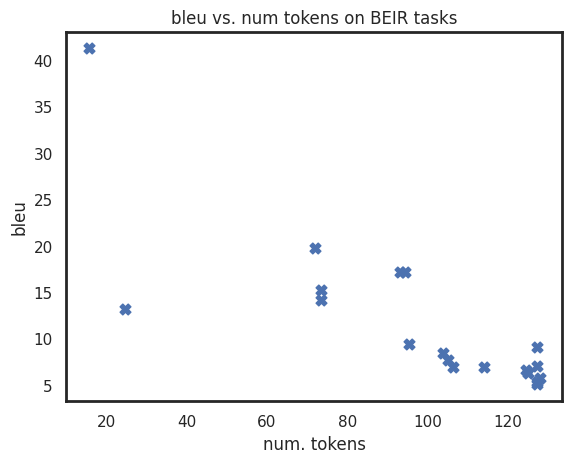

In [94]:
ax = results_df.plot(kind='scatter', x='eval_true_num_tokens', y='eval_bleu_score', s=60, marker='X')

ax.set_xlabel('num. tokens')
ax.set_ylabel('bleu')
ax.set_title('bleu vs. num tokens on BEIR tasks')

In [64]:
len(plot_labels), len(plot_data), len(plot_column)

(6932, 6932, 6932)

In [53]:
df

,Dataset,Length,Label
0,arguana,127,Predicted
1,arguana,127,Predicted
2,arguana,127,Predicted
3,arguana,127,Predicted
4,arguana,127,Predicted
...,...,...,...
6927,hotpotqa,tensor(81),True
6928,hotpotqa,tensor(58),True
6929,hotpotqa,tensor(93),True
6930,hotpotqa,tensor(65),True


In [67]:
len(beir)

19

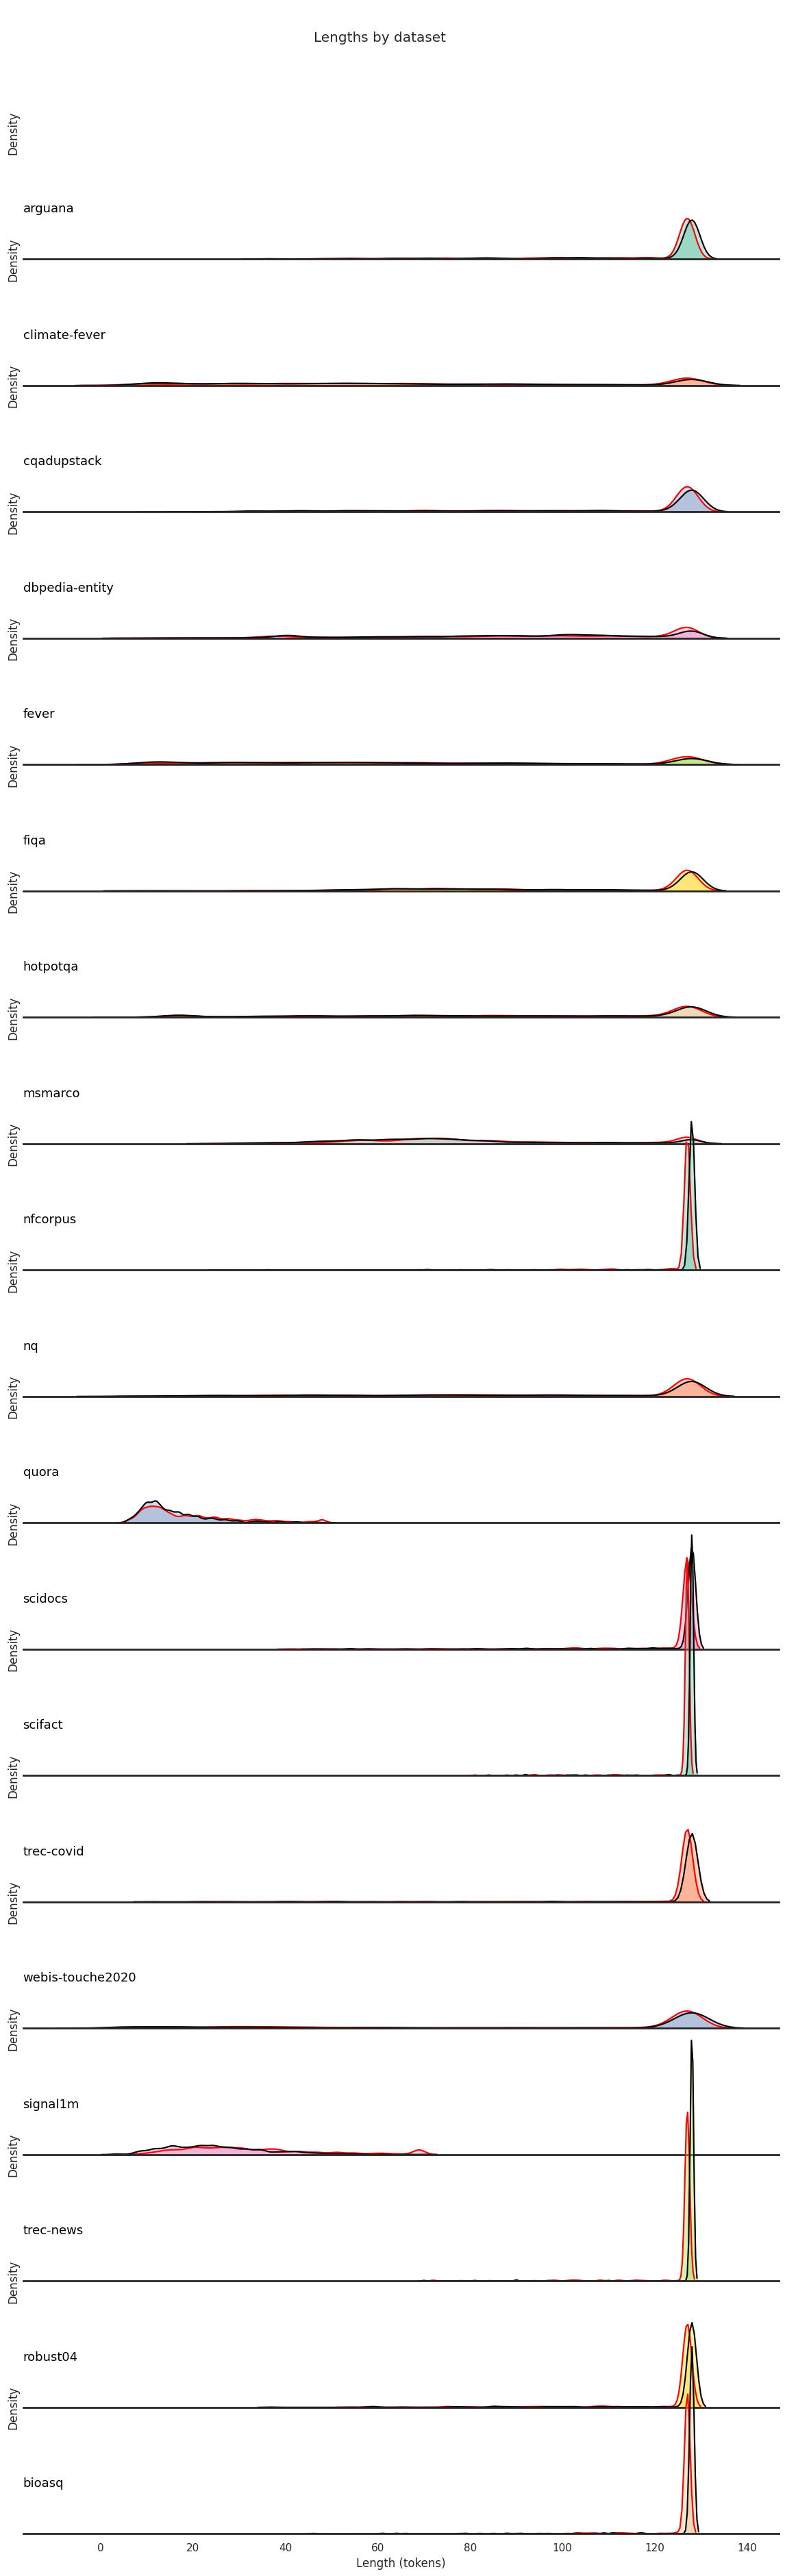

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 
#  plotting code from chatGPT
# 

# Extracting the labels, column 2 data, and column 3 data
reshaped_data = []
for (dataset, pred, true) in data:
    for p in pred.tolist(): 
        for t in true.tolist():
            reshaped_data.append( (dataset, p, t) )


# Creating a dataframe from the reshaped data
df = pd.DataFrame(reshaped_data, columns=['Dataset', 'pred_num_tokens', 'true_num_tokens'])

# Plotting the ridge plot
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="Dataset", hue="Dataset", aspect=6, height=2.0)

# map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="pred_num_tokens", fill=True, alpha=.4)
g.map_dataframe(sns.kdeplot, x="pred_num_tokens", color='red')
g.map_dataframe(sns.kdeplot, x="true_num_tokens", fill=True, alpha=.4)
g.map_dataframe(sns.kdeplot, x="true_num_tokens", color='black')

# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "Dataset")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="Length (tokens)")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Lengths by dataset', y=0.98)

plt.savefig('length_ridgeplot.png')

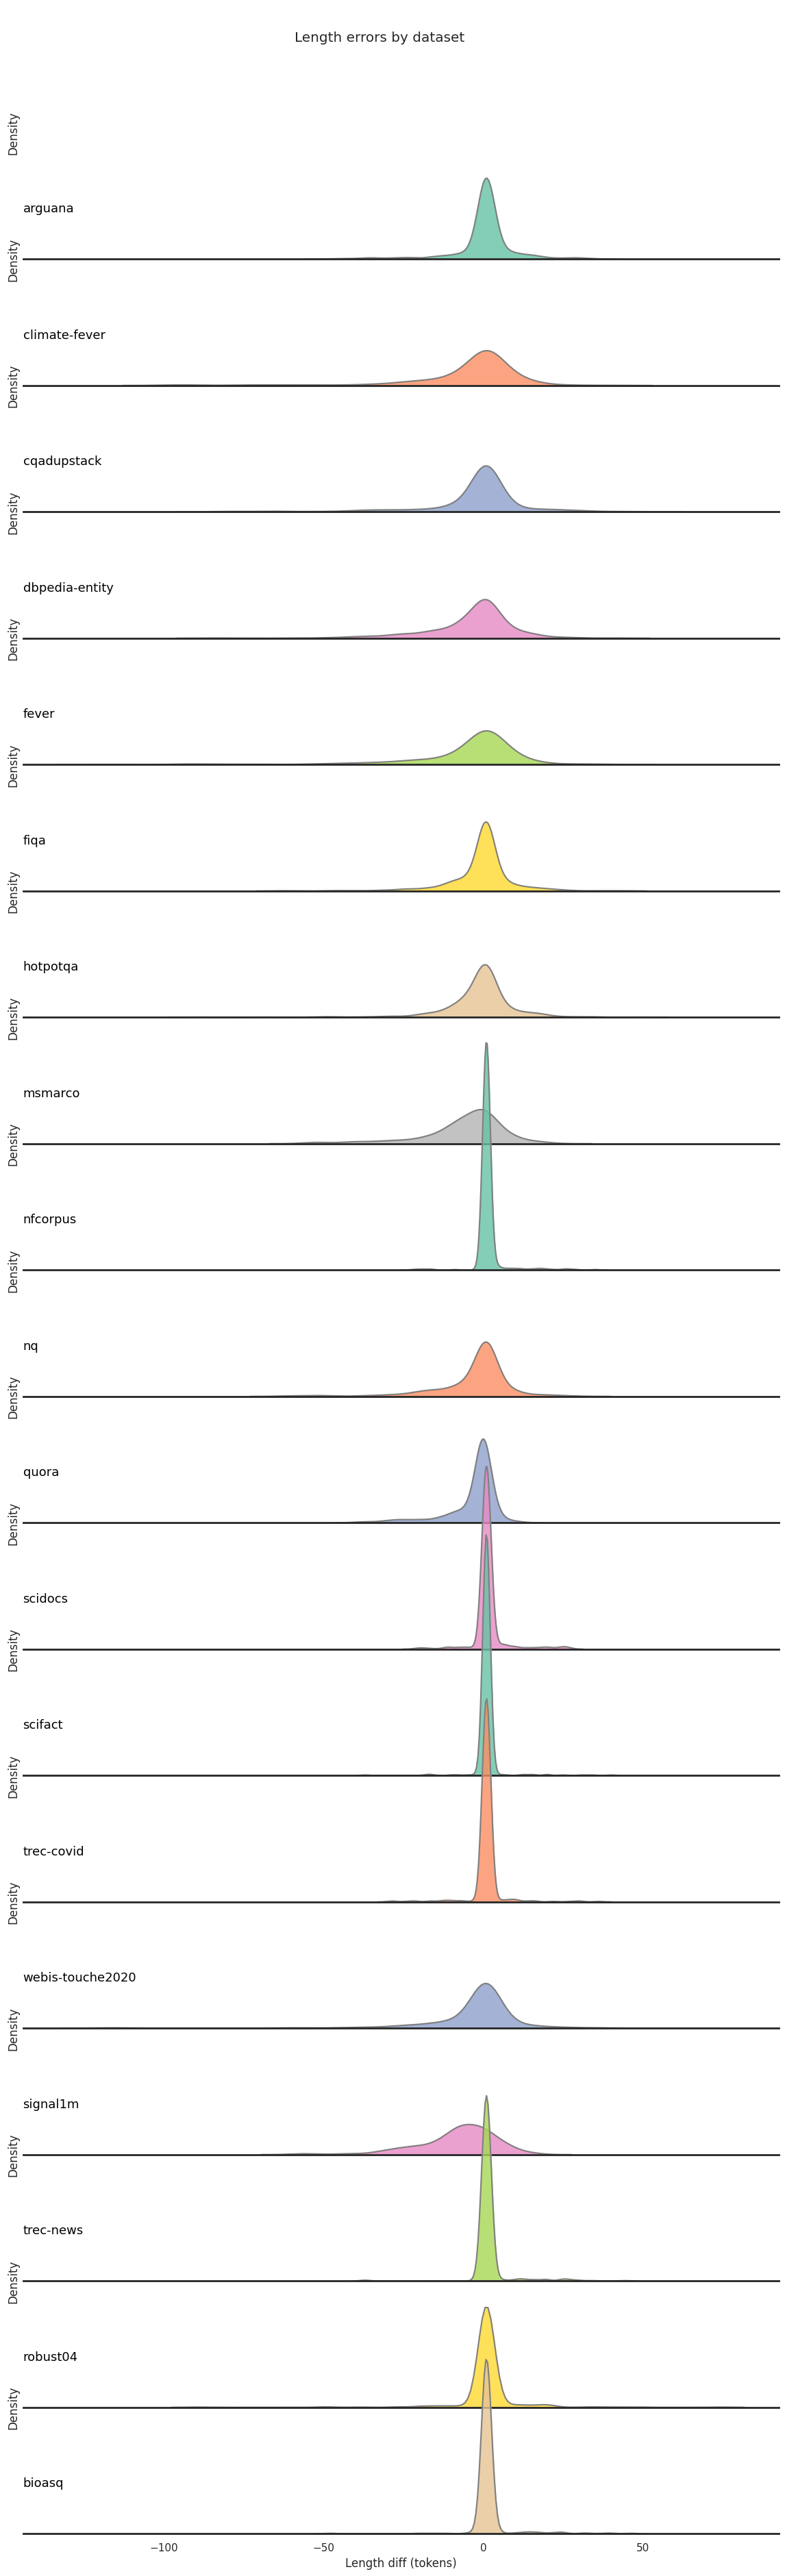

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 
#  plotting code from chatGPT
# 

# Extracting the labels, column 2 data, and column 3 data
reshaped_data = []
for (dataset, pred, true) in data:
    for (t,p) in zip(true.tolist(), pred.tolist()): 
            reshaped_data.append( (dataset, t-p) )


# Creating a dataframe from the reshaped data
df = pd.DataFrame(reshaped_data, columns=['Dataset', 'diff_num_tokens'])

# Plotting the ridge plot
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="Dataset", hue="Dataset", aspect=6, height=2.0)

# map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="diff_num_tokens", fill=True, alpha=.8)
g.map_dataframe(sns.kdeplot, x="diff_num_tokens", color='gray')
# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "Dataset")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="Length diff (tokens)")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Length errors by dataset', y=0.98)

plt.savefig('length_error_ridgeplot.png')

In [51]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
ID,,,,,,
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
...,...,...,...,...,...,...
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


Text(0.5, 0.98, 'Netflix Originals - IMDB Scores by Language')

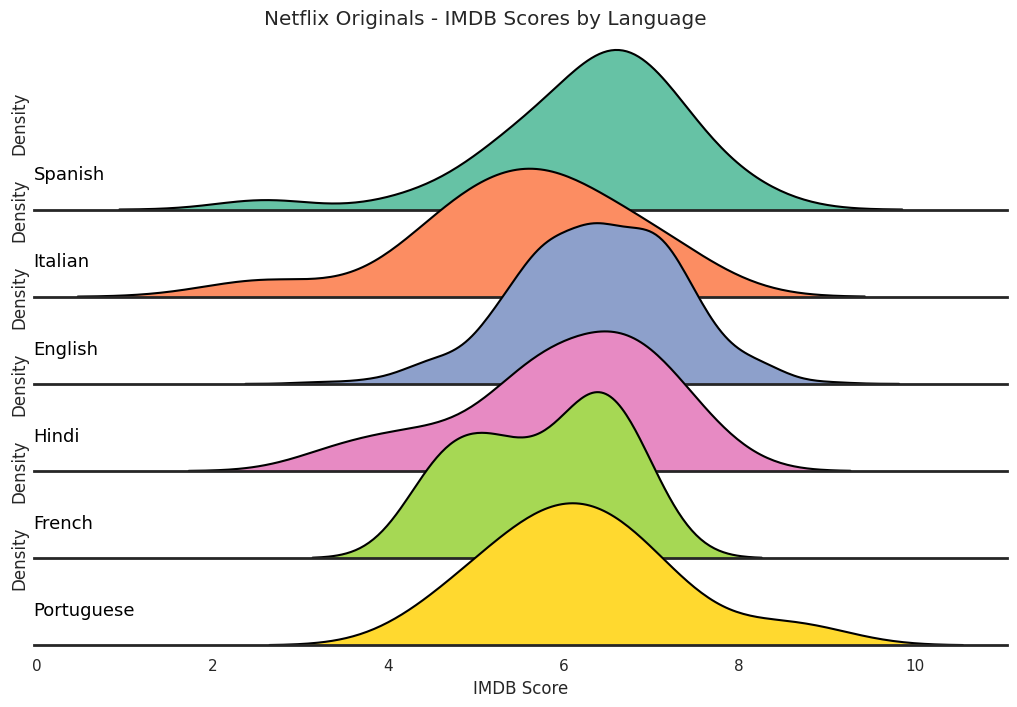

In [ ]:
# ridge plot example
# DATA
url = 'https://gist.githubusercontent.com/Thiagobc23/4ccb4ea1c612d9d68921bf990ce28855/raw/07af955c17d1816aba58dea74d65f60210702a15/film.csv'
df = pd.read_csv(url, index_col='ID')

# Theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

# create a grid with a row for each 'Language'
g = sns.FacetGrid(df, palette=palette, row="Language", hue="Language", aspect=9, height=1.2)

# map df - Kernel Density Plot of IMDB Score for each Language
g.map_dataframe(sns.kdeplot, x="IMDB Score", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="IMDB Score", color='black')

# function to draw labels
def label(x, color, label):
    ax = plt.gca() #get current axis
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
# iterate grid to plot labels
g.map(label, "Language")

# adjust subplots to create overlap
g.fig.subplots_adjust(hspace=-.5)

# remove subplot titles
g.set_titles("")

# remove yticks and set xlabel
g.set(yticks=[], xlabel="IMDB Score")
# remove left spine
g.despine(left=True)
# set title
plt.suptitle('Netflix Originals - IMDB Scores by Language', y=0.98)

# plt.savefig('ridgeplot.png')

## plot hypothesis distance

In [95]:
corr_trainer.train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'length', 'embedder_input_ids', 'embedder_attention_mask', 'idx', 'frozen_embeddings', 'hypothesis_embedding', 'hypothesis_input_ids', 'hypothesis_attention_mask'],
    num_rows: 1000000
})

In [10]:
from typing import Dict
import torch

def add_distance_to_dataset(batch: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
    e1 = torch.tensor(batch["frozen_embeddings"], device="cpu")
    e2 = torch.tensor(batch["hypothesis_embedding"], device="cpu")
    batch["hypothesis_distance"] = torch.nn.CosineSimilarity(dim=1)(e1, e2).cpu()
    return batch

ds_with_distances = corr_trainer.train_dataset.select(range(10**5)).map(add_distance_to_dataset, batched=True, batch_size=4096)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

/tmp/ipykernel_804785/1838467157.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  e1 = torch.tensor(batch["frozen_embeddings"], device="cpu")
/tmp/ipykernel_804785/1838467157.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  e2 = torch.tensor(batch["hypothesis_embedding"], device="cpu")


In [ ]:
def add_bleu_to_dataset(batch: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:

(0.85, 1.0)

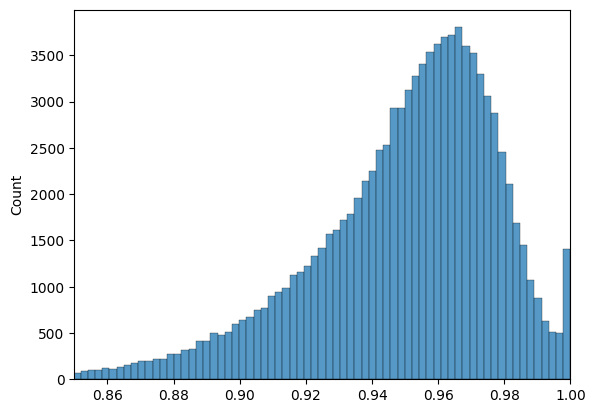

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
ax = sns.histplot(ds_with_distances["hypothesis_distance"], bins=150)

ax.set_xlim([.85,1])
# ax.set_ylim([0, 3_000])
# ax.set_xlabel("Cosine distance from hypothesis to true embedding (sequence length 128)")
# ax.set_xscale("log")

# save to PDF
# plt.savefig("train_hypothesis_distance_sl128.pdf", format="pdf", bbox_inches="tight") 

In [14]:
ds_with_distances["hypothesis_distance"].mean()

tensor(0.9488)

In [97]:
corr_trainer.train_dataset.select(range(16))

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'length', 'embedder_input_ids', 'embedder_attention_mask', 'idx', 'frozen_embeddings', 'hypothesis_embedding', 'hypothesis_input_ids', 'hypothesis_attention_mask'],
    num_rows: 16
})

In [ ]:
trainer.metric_bleu

In [135]:
from typing import Dict
import torch


def bleu(t1: torch.Tensor, t2: torch.Tensor) -> float:
    s1 = corr_trainer.embedder_tokenizer.decode(t1, skip_special_tokens=True)
    s2 = corr_trainer.embedder_tokenizer.decode(t2, skip_special_tokens=True)
    result = corr_trainer.metric_bleu.compute(
        predictions=[s1], references=[s2]
    )
    return result["score"]

def add_bleu_to_dataset(batch: Dict[str, torch.Tensor]) -> Dict[str, torch.Tensor]:
    batch["hypothesis_bleu"] = []
    for input_ids, hypothesis_ids in zip(batch["input_ids"], batch["hypothesis_input_ids"]):
        batch["hypothesis_bleu"].append(
            bleu(input_ids, hypothesis_ids)
        )
    batch["hypothesis_bleu"] = torch.tensor(batch["hypothesis_bleu"])

    return batch

ds_with_bleu = corr_trainer.train_dataset.select(range(10**5)).map(add_bleu_to_dataset, batched=True, batch_size=1024)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

In [140]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Text(0.5, 1.0, 'Hypothesis BLEU scores')

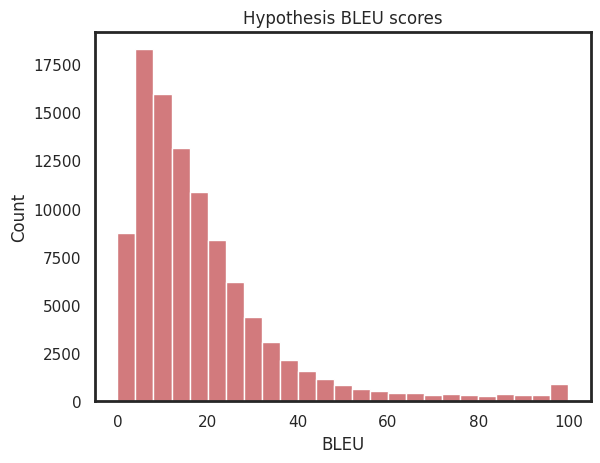

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
ax = sns.histplot(ds_with_bleu["hypothesis_bleu"], bins=25, color=sns.color_palette()[3])

# ax.set_xlim([.85,1])
# ax.set_ylim([0, 3_000])
ax.set_xlabel("BLEU")
# ax.set_xscale("log")

ax.set_title("Hypothesis BLEU scores")

# save to PDF
# plt.savefig("train_hypothesis_distance_sl128.pdf", format="pdf", bbox_inches="tight") 

In [121]:
perfect_hypotheses = ds_with_tokens_correct.filter(lambda ex: ex["num_wrong_tokens"] == 0)

In [125]:
print(f'[pred] {corr_trainer.embedder_tokenizer.decode(perfect_hypotheses[0]["hypothesis_input_ids"])}')
print(f'[true] {corr_trainer.embedder_tokenizer.decode(perfect_hypotheses[0]["input_ids"])}')

[pred] <pad> This is the British English definition of motorway. View American English definition of motorway. Change your default dictionary to American English. View the pronunciation for motorway.0% of the time, speakers of English use just 7,500 words in speech and writing. These words appear in red, and are graded with stars. One-star words are frequent, two-star words are more frequent, and three-star words are the most frequent.
[true] This is the British English definition of motorway. View American English definition of motorway. Change your default dictionary to American English. View the pronunciation for motorway.0% of the time, speakers of English use just 7,500 words in speech and writing. These words appear in red, and are graded with stars.</s>
